# Author:  Daniel Lagos

https://github.com/danlagos/ANA500-Week-4

Date:  23 October 2022

ANA 500

In [49]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pydot
import glob
import zipfile

In [48]:
%matplotlib inline

## Bring in CHIS 2020 from local hardrive
## take zipped file "adult.zip" Unzip.  put file path in FILE_LOC

In [8]:
FILE_LOC = 'C:/Users/lagos/OneDrive/Documents/National University/8 - ANA 500/Week 1/homework/adult.sas7bdat'
df = pd.read_sas(FILE_LOC)

In [10]:
df.head()

,AA5C,AA5G,AH37,AH44,AB1,AB17,AB40,AB41,AB18,AB43,...,RAKEDW71,RAKEDW72,RAKEDW73,RAKEDW74,RAKEDW75,RAKEDW76,RAKEDW77,RAKEDW78,RAKEDW79,RAKEDW80
0,-1.0,-1.0,-1.0,-1.0,3.0,2.0,-1.0,-1.0,-1.0,-1.0,...,1605.912814,1577.479222,1578.109407,1566.686492,1657.063161,1598.357033,1610.132833,1577.495627,1607.168800,1602.605396
1,-1.0,-1.0,-1.0,1.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,...,1558.197812,1513.430922,1537.924152,1537.402328,1529.306613,1544.735340,1531.233715,1557.723321,1562.932975,1503.820145
2,-1.0,-1.0,-1.0,-1.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,...,1211.750536,1212.772970,1202.982303,1225.293304,1248.000638,1216.821869,1233.241885,1201.254104,1201.887010,1218.093974
3,-1.0,-1.0,-1.0,-1.0,3.0,1.0,1.0,2.0,2.0,2.0,...,590.153646,604.817107,596.879484,594.582363,587.412696,590.762356,589.418840,598.307511,1195.997735,581.912369
4,-1.0,1.0,-1.0,1.0,4.0,2.0,-1.0,-1.0,-1.0,-1.0,...,194.059102,188.468808,201.853958,195.711101,200.749310,191.936914,206.431383,205.310211,449.979358,197.861495


In [11]:
df.shape

(21949, 604)

In [12]:
df.describe()

,AA5C,AA5G,AH37,AH44,AB1,AB17,AB40,AB41,AB18,AB43,...,RAKEDW71,RAKEDW72,RAKEDW73,RAKEDW74,RAKEDW75,RAKEDW76,RAKEDW77,RAKEDW78,RAKEDW79,RAKEDW80
count,21949.000000,21949.000000,21949.000000,21949.000000,21949.000000,21949.000000,21949.000000,21949.000000,21949.000000,21949.000000,...,21949.000000,21949.000000,21949.000000,21949.000000,21949.000000,21949.000000,21949.000000,21949.000000,21949.000000,21949.000000
mean,-0.960636,-0.552098,-0.326302,0.222379,2.341291,1.833888,-0.599526,-0.554832,-0.550913,-0.591325,...,1352.448039,1352.448039,1352.448039,1352.448039,1352.448039,1352.448039,1352.448039,1352.448039,1352.448039,1352.448039
std,0.659912,1.168150,1.184560,0.991387,0.981429,0.372190,0.919431,1.015401,1.023292,0.937936,...,2091.435859,2092.901363,2104.900368,2096.036125,2088.729887,2095.567090,2092.335538,2092.694536,2090.307319,2095.867094
min,-9.000000,-9.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,324.818102,324.039229,321.739889,323.658659,324.031699,325.738785,325.421122,325.554856,325.176711,324.560691
50%,-1.000000,-1.000000,-1.000000,1.000000,2.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,662.639879,660.627028,657.665679,659.843086,660.241920,661.285882,661.043202,662.490129,663.135013,661.093321
75%,-1.000000,-1.000000,1.000000,1.000000,3.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1418.223673,1419.556965,1417.607116,1419.031915,1420.503449,1417.095377,1420.961575,1420.260658,1424.068916,1424.040072
max,2.000000,2.000000,4.000000,2.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,18174.157476,18134.149592,18255.106622,18324.520579,18092.706574,18319.886710,18085.542721,18336.221861,18146.713144,18275.092123


## VAR DEPRESSION

In [13]:
df.AJ32.describe()

count    21949.000000
mean         4.631783
std          0.734293
min         -2.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: AJ32, dtype: float64

## VAR SMOKING HABITS

In [14]:
df.SMOKING.describe()

count    21949.000000
mean         2.638343
std          0.582503
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: SMOKING, dtype: float64

## VAR GENERAL HEALTH

In [15]:
df.AB1.describe() 

count    21949.000000
mean         2.341291
std          0.981429
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: AB1, dtype: float64

## POVERTY LEVELS AS LEVELS OF FEDERAL POVERTY LEVELS 

In [16]:
df.POVLL.describe() 

count    21949.000000
mean         3.423983
std          0.973787
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: POVLL, dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21949 entries, 0 to 21948
Columns: 604 entries, AA5C to RAKEDW80
dtypes: float64(603), object(1)
memory usage: 101.1+ MB


## Filter data:  Get rid of values of negative values
##  Also remove un-needed variables

In [18]:
df = df.loc[:, ['SMOKING', 'AB1', 'POVLL', 'AJ32']]
df = df[(df['AJ32'] > -1)]

smokingCurrent = df.SMOKING # CURRENT SMOKING HABITS - CAT
generalHealth = df.AB1 # GENERAL HEALTH CONDITION - CAT
povertyFPL = df.POVLL # FPL - CAT
depression = df.AJ32 # feeling depressed in last 30 days - CAT - DEP VAR

##  Confirm negative values are gone.

In [19]:
df.describe()

,SMOKING,AB1,POVLL,AJ32
count,21944.000000,21944.000000,21944.000000,21944.000000
mean,2.638307,2.341232,3.423943,4.633294
std,0.582533,0.981413,0.973866,0.727520
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,5.000000
50%,3.000000,2.000000,4.000000,5.000000
75%,3.000000,3.000000,4.000000,5.000000
max,3.000000,5.000000,4.000000,5.000000


# Histograms 

## Current smoking habits

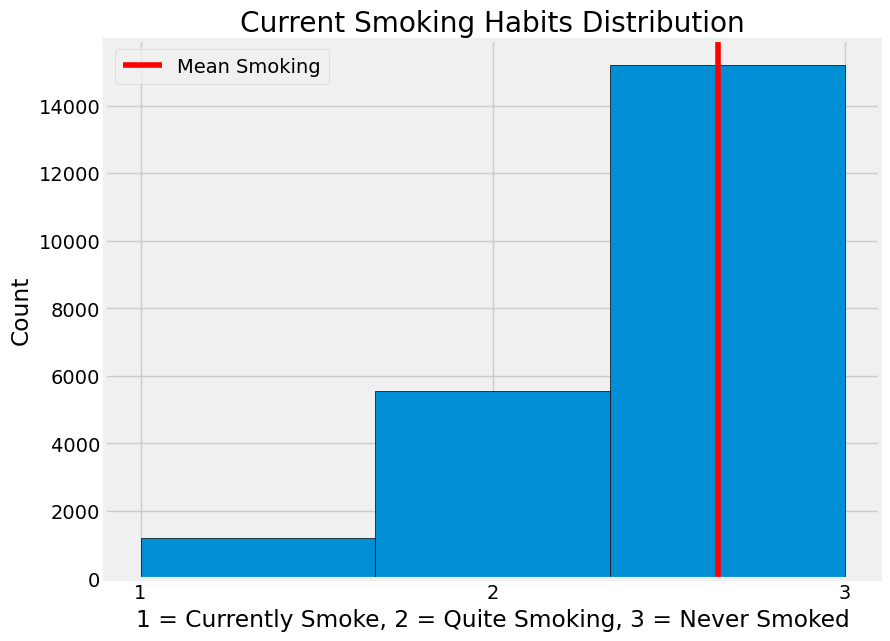

In [20]:
smoking_mean=2.638307
smoking_color='red'
plt.figure(figsize=(10,7))
plt.style.use('fivethirtyeight')
plt.hist(df['SMOKING'], bins=3, edgecolor='black')
plt.title("Current Smoking Habits Distribution")
plt.xlabel('1 = Currently Smoke, 2 = Quite Smoking, 3 = Never Smoked')
plt.xticks([1, 2, 3])
plt.ylabel('Count')
plt.axvline(smoking_mean, color=smoking_color, label='Mean Smoking')
plt.legend()

## General Health

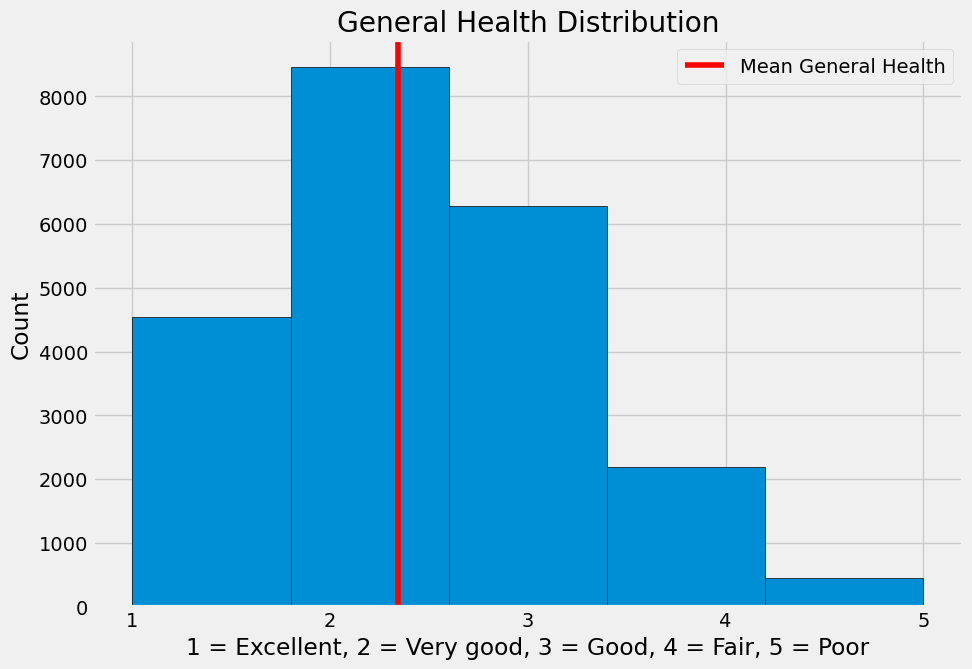

In [21]:
#g_h_labels = ['1:excellent', '2:very good', '3: good', '4: fair', '5: poor']
gen_health_mean=2.341232
gen_health_color='red'
plt.figure(figsize=(10,7))
plt.style.use('fivethirtyeight')
plt.hist(df['AB1'], bins=5, edgecolor='black')
plt.title("General Health Distribution")
plt.xlabel('1 = Excellent, 2 = Very good, 3 = Good, 4 = Fair, 5 = Poor')
plt.xticks([1, 2, 3, 4, 5])
plt.ylabel('Count')
plt.axvline(gen_health_mean, color=gen_health_color, label='Mean General Health')
plt.legend()

## Poverty level, as percentage of federal poverty level (FPL)

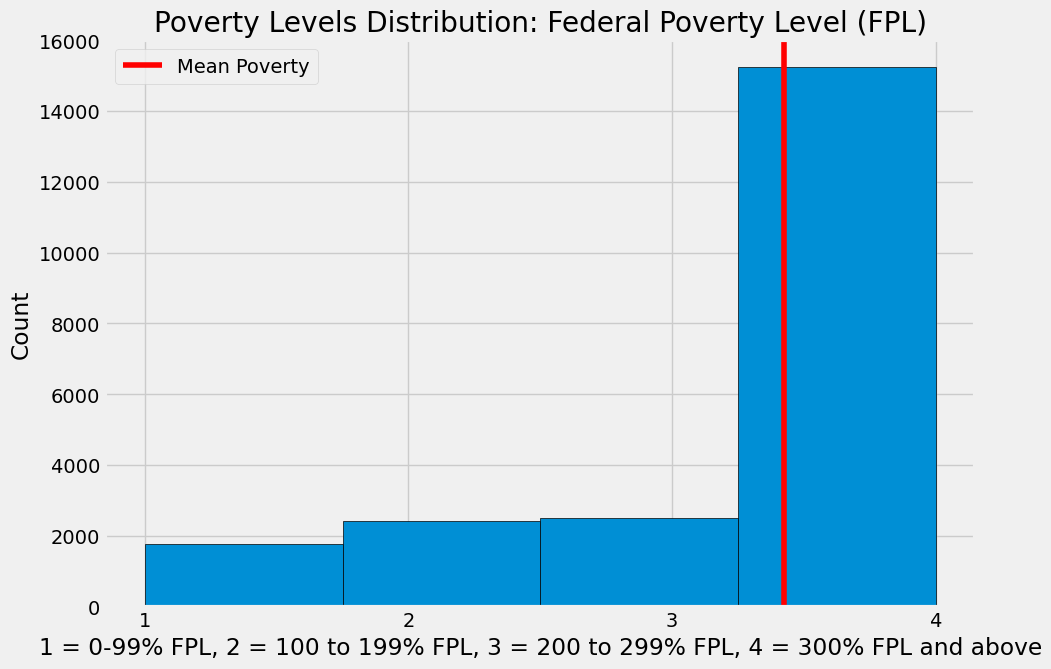

In [22]:
poverty_mean=3.423943
poverty_color='red'
plt.figure(figsize=(10,7))
plt.style.use('fivethirtyeight')
plt.hist(df['POVLL'], bins=4, edgecolor='black')
plt.title("Poverty Levels Distribution: Federal Poverty Level (FPL)")
plt.xlabel('1 = 0-99% FPL, 2 = 100 to 199% FPL, 3 = 200 to 299% FPL, 4 = 300% FPL and above')
plt.xticks([1, 2, 3, 4])
plt.ylabel('Count')
plt.axvline(poverty_mean, color=poverty_color, label='Mean Poverty')
plt.legend()

## Depression

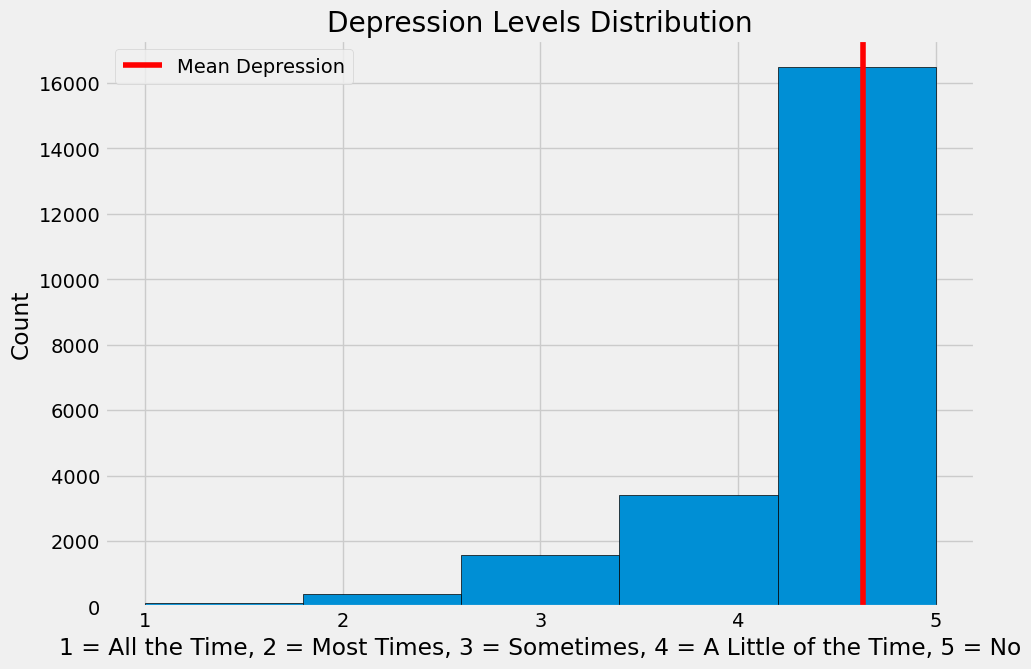

In [23]:
depression_mean=4.633294
depression_color='red'
plt.figure(figsize=(10,7))
plt.style.use('fivethirtyeight')
plt.hist(df['AJ32'], bins=5, edgecolor='black')
plt.title("Depression Levels Distribution")
plt.xlabel('1 = All the Time, 2 = Most Times, 3 = Sometimes, 4 = A Little of the Time, 5 = No')
plt.xticks([1, 2, 3, 4, 5])
plt.ylabel('Count')
plt.axvline(depression_mean, color=depression_color, label='Mean Depression')
plt.legend()

##  Smoking vs Depression

<AxesSubplot:xlabel='SMOKING', ylabel='AJ32'>

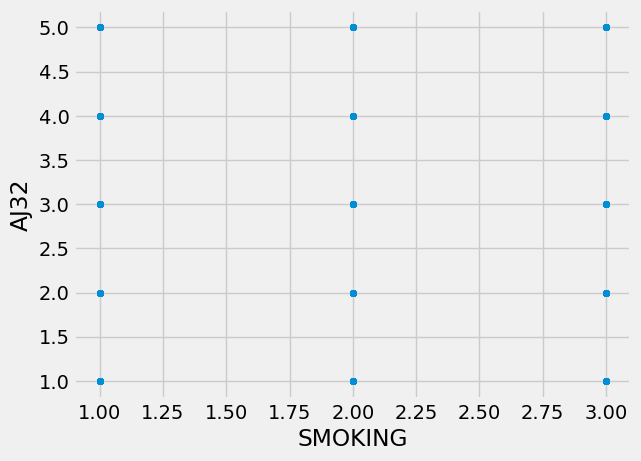

In [24]:
df.plot.scatter(x='SMOKING', y='AJ32')

# Box plots

## Boxplot:  Depression

Text(0.5, 0, 'VAR:  Depression')

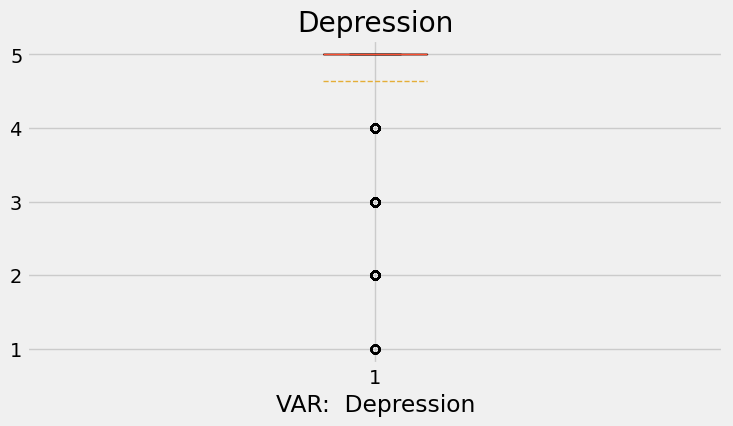

In [25]:
plt.figure(figsize=(8,4))
plt.boxplot(df['AJ32'], showmeans=True, meanline=True)
plt.title("Depression")
plt.xlabel('VAR:  Depression')

## Boxplot:  General Health

Text(0.5, 0, 'VAR:  General Health')

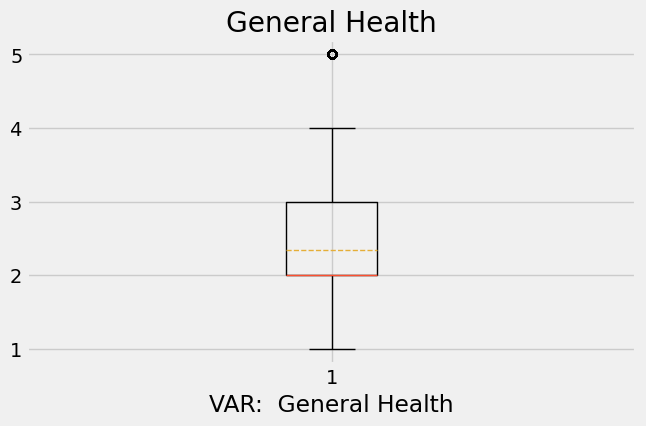

In [26]:
plt.figure(figsize=(7,4))
plt.boxplot(df['AB1'], showmeans=True, meanline=True)
plt.title("General Health")
plt.xlabel('VAR:  General Health')

## Boxplot:  Smoking Habits

Text(0.5, 0, 'VAR:  Smoking Habits')

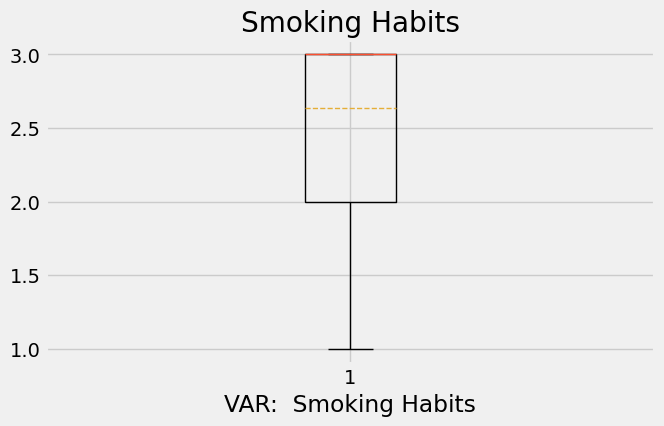

In [27]:
plt.figure(figsize=(7,4))
plt.boxplot(df['SMOKING'], showmeans=True, meanline=True)
plt.title("Smoking Habits")
plt.xlabel('VAR:  Smoking Habits')

## Boxplot:  Poverty

Text(0.5, 0, 'VAR:  Poverty')

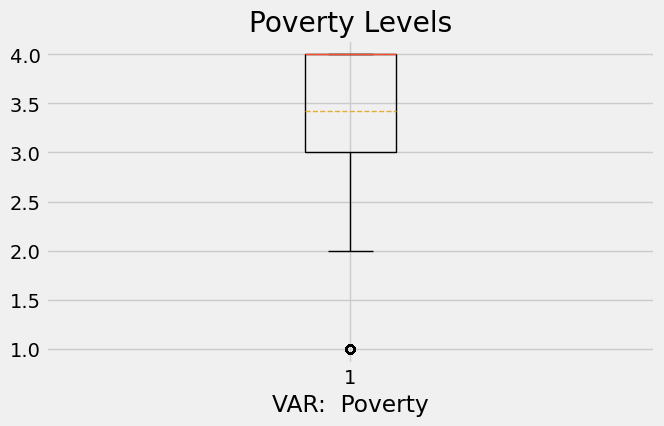

In [28]:
plt.figure(figsize=(7,4))
plt.boxplot(df['POVLL'], showmeans=True, meanline=True)
plt.title("Poverty Levels")
plt.xlabel('VAR:  Poverty')

## Correlation Matrix

In [29]:
df.corr()

,SMOKING,AB1,POVLL,AJ32
SMOKING,1.000000,-0.145927,0.059351,0.037362
AB1,-0.145927,1.000000,-0.211444,-0.197935
POVLL,0.059351,-0.211444,1.000000,0.135364
AJ32,0.037362,-0.197935,0.135364,1.000000


## Rename Variables

Create new data frame with clean data, rename  variables.

In [30]:
df_renamed = df.rename(columns = {'AB1': "GEN_HEALTH", "POVLL": "POVERTY", 'AJ32': 'DEPRESSION'})

In [31]:
df_renamed.describe()

,SMOKING,GEN_HEALTH,POVERTY,DEPRESSION
count,21944.000000,21944.000000,21944.000000,21944.000000
mean,2.638307,2.341232,3.423943,4.633294
std,0.582533,0.981413,0.973866,0.727520
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,5.000000
50%,3.000000,2.000000,4.000000,5.000000
75%,3.000000,3.000000,4.000000,5.000000
max,3.000000,5.000000,4.000000,5.000000


## Summary

**DEPRESSION**:  Dependent variable. Coded in CHIS as AJ32.  Survey question:  Feeling depressed in the past 30 days?

    Coding: 

        1 = all the time
        2 = most of the time
        3 = some of the time
        4 = a little of the time
        5 = not at all
    
**POVERTY**:  Coded as POVLL in CHIS.  Calculated from respondants annual income and converted to reflect federal poverty levels (PFL).

    Coding:

        1 = 0-99% FPL
        2 = 100 to 199% FPL
        3 = 200 to 299% FPL
        4 = 300% FPL and above

**GEN_HEALTH**:  Coded in CHIS as AB1.  Tracks respondants self reported general health condition.

    Coding:  

        1 = excellent
        2 = very good
        3 = good
        4 = fair
        5 = poor
    
**SMOKING**:  Coded in CHIS as SMOKING.  Tracks respondants self reported smoking habits.  If resondant indicated not smoking >= 100 cigarettes in lifetime then categorized as "never smoked regularly."

    Coding

        1 = currently smokes
        2 = quit smoking
        3 = never smoked regularly

#  Re-create model with Var DEPRESSION as binary

make Var Depression Binary.

If DEPRESSION = 5 then newDep = 2 Meaning, not-depressed

if DEPRESSION <= 5 then newDep = 1 Meaning depressed.

In [32]:
df_renamed.loc[df_renamed['DEPRESSION'] > 4, 'NEW_DEP'] = 2 # NOT DEPRESSED
df_renamed.loc[df_renamed['DEPRESSION'] <= 4, 'NEW_DEP'] = 1 # DEPRESSED
df_renamed.describe()

,SMOKING,GEN_HEALTH,POVERTY,DEPRESSION,NEW_DEP
count,21944.000000,21944.000000,21944.000000,21944.000000,21944.000000
mean,2.638307,2.341232,3.423943,4.633294,1.751868
std,0.582533,0.981413,0.973866,0.727520,0.431938
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,5.000000,2.000000
50%,3.000000,2.000000,4.000000,5.000000,2.000000
75%,3.000000,3.000000,4.000000,5.000000,2.000000
max,3.000000,5.000000,4.000000,5.000000,2.000000


# Visualiztion for new variable of DEPRESSION

Histogram:  NEW_DEP

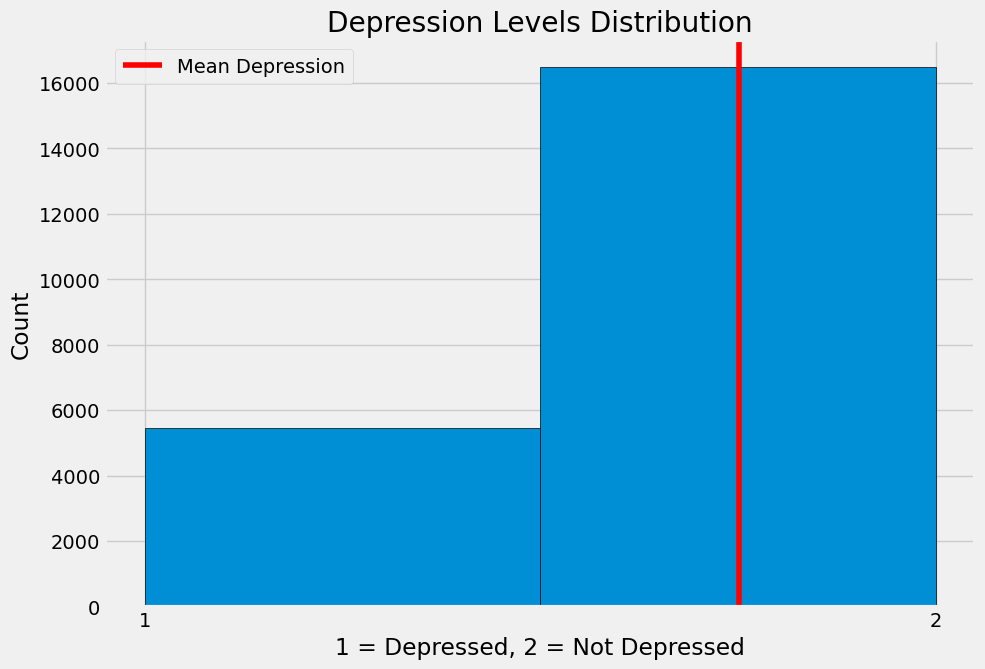

In [35]:
depression_mean=1.751868
depression_color='red'
plt.figure(figsize=(10,7))
plt.style.use('fivethirtyeight')
plt.hist(df_renamed['NEW_DEP'], bins=2, edgecolor='black')
plt.title("Depression Levels Distribution")
plt.xlabel('1 = Depressed, 2 = Not Depressed')
plt.xticks([1, 2])
plt.ylabel('Count')
plt.axvline(depression_mean, color=depression_color, label='Mean Depression')
plt.legend()

Box plot:  NEW_DEP

Text(0.5, 0, 'VAR:  Depression')

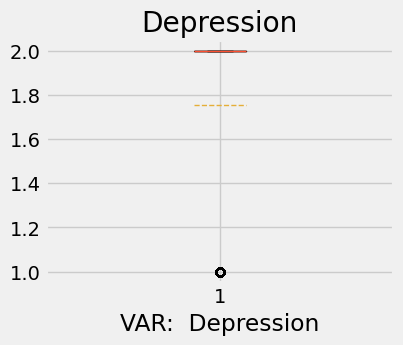

In [37]:
plt.figure(figsize=(4,3))
plt.boxplot(df_renamed['NEW_DEP'], showmeans=True, meanline=True)
plt.title("Depression")
plt.xlabel('VAR:  Depression')

# Run Neural Network with new variable for Depression

#### Create "Y_New" dataframe out of Depression

In [38]:
Y_New = df_renamed[['NEW_DEP']]
print(type(Y_New))
Y_New.describe()

<class 'pandas.core.frame.DataFrame'>


,NEW_DEP
count,21944.000000
mean,1.751868
std,0.431938
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


#### Create "X_New" dataframe  out of POVERTY, GEN_HEALTH, SMOKING

In [39]:
ind_var_feat = df_renamed.columns[0:-2]
ind_var_feat

Index(['SMOKING', 'GEN_HEALTH', 'POVERTY'], dtype='object')

In [40]:
X_New = df_renamed[ind_var_feat]
X_New.describe()

,SMOKING,GEN_HEALTH,POVERTY
count,21944.000000,21944.000000,21944.000000
mean,2.638307,2.341232,3.423943
std,0.582533,0.981413,0.973866
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000
50%,3.000000,2.000000,4.000000
75%,3.000000,3.000000,4.000000
max,3.000000,5.000000,4.000000


# Split data set into training and testing sets

In [41]:
X_New_train, X_New_test, Y_New_train, Y_New_test = train_test_split(X_New, Y_New, 
                                                                    test_size=0.33, 
                                                                    random_state=42
                                                                   )

confirm splits

In [42]:
print(type(X_New_train))
print(type(X_New_test))
print(type(Y_New_train))
print(type(Y_New_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [43]:
#  Look at new data sets for confirmation
X_New_train.describe()

,SMOKING,GEN_HEALTH,POVERTY
count,14702.000000,14702.000000,14702.000000
mean,2.638212,2.341518,3.428853
std,0.581829,0.982821,0.971433
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000
50%,3.000000,2.000000,4.000000
75%,3.000000,3.000000,4.000000
max,3.000000,5.000000,4.000000


In [44]:
X_New_test.describe()

,SMOKING,GEN_HEALTH,POVERTY
count,7242.000000,7242.000000,7242.000000
mean,2.638498,2.340652,3.413974
std,0.584000,0.978615,0.978777
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000
50%,3.000000,2.000000,4.000000
75%,3.000000,3.000000,4.000000
max,3.000000,5.000000,4.000000


In [45]:
Y_New_test.describe()

,NEW_DEP
count,7242.000000
mean,1.752555
std,0.431558
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


In [46]:
Y_New_train.describe()

,NEW_DEP
count,14702.00000
mean,1.75153
std,0.43214
min,1.00000
25%,2.00000
50%,2.00000
75%,2.00000
max,2.00000


# Build to model

In [56]:
model = keras.models.Sequential()
model.add(keras.Input(shape=3, dtype='float64'))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 300)               1200      
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 2)                 202       
                                                                 
Total params: 31,502
Trainable params: 31,502
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.layers

# Train the model

# Train the classifier

In [36]:
dep_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42, max_depth=5, ccp_alpha=0.01, criterion='entropy') 
# original was random_state=0

Output is a decision tree classifier object.

max_leaf_nodes is the stopping criteria for the tree induction, default is 'unlimited' which can potentially over-fit the tree to the training data

random_state argument is used for splitting the nodes - it's the "random seed", i.e., controols the randomness of the estimator.

In [37]:
dep_clf.fit(X_New_train, Y_New_train) 
# Train with the fit method of the object, i.e., the classifier will tune itself.

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       max_leaf_nodes=10, random_state=42)

In [38]:
type(dep_clf)

sklearn.tree._classes.DecisionTreeClassifier

#  Parameters of Model

In [39]:
dep_clf.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

# Histogram of the test data

(array([[ 399.,    0., 1820.,    0.,    0., 5023.,    0.,    0.,    0.,
            0.],
        [1481.,    0., 2838.,    0.,    0., 2046.,    0.,  729.,    0.,
          148.],
        [ 585.,    0.,  835.,    0.,    0.,  819.,    0., 5003.,    0.,
            0.]]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 3 BarContainer objects>)

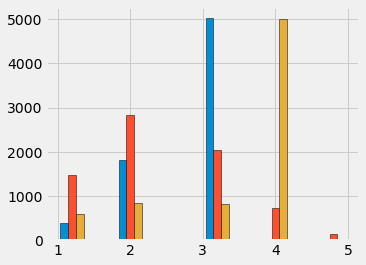

In [40]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5,4))
plt.hist(X_New_test, edgecolor='black')

In [41]:
X_New_test

,SMOKING,GEN_HEALTH,POVERTY
5052,2.0,3.0,4.0
11748,3.0,1.0,4.0
6249,3.0,3.0,4.0
1453,3.0,3.0,2.0
10885,3.0,2.0,4.0
...,...,...,...
15375,3.0,2.0,4.0
10576,2.0,1.0,4.0
6377,3.0,3.0,2.0
14909,3.0,2.0,4.0


# Predict on test data

In [42]:
predictions_new = dep_clf.predict(X_New_test)

# Histogram of predictions

(array([   0., 7242.]),
 array([1.5, 2. , 2.5]),
 <BarContainer object of 2 artists>)

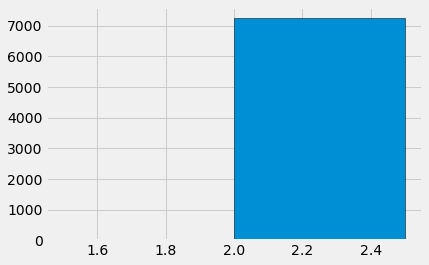

In [43]:
plt.hist(predictions_new, edgecolor='black', bins=2)

In [44]:
predictions_new[:50]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

# Measure accuracy of the classifier

In [45]:
accuracy_score(Y_New_test, predictions_new)

0.7525545429439381

# Initial Notes and Conclusions

These are the same results as my non-binary model.  What is going on?

Classifier accuracy = 75.2554%

# Measure precision of the classifier

Again, the same results as non-binary model

We have a 56.6338% precision

In [46]:
from sklearn.metrics import precision_score
precision_score(Y_New_test, predictions_new, average='weighted')

C:\Users\Daniel Lagos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5663383401055596

# Recall Score

again, results are suspect.  If recall score = 0, this normally means my classifier is bad at predicting

In [47]:
from sklearn.metrics import recall_score
recall_score(Y_New_test, predictions_new)

0.0

# Probability of the predictions


In [48]:
dep_clf.predict_proba(X_New_test)

array([[0.32639814, 0.67360186],
       [0.19461698, 0.80538302],
       [0.32639814, 0.67360186],
       ...,
       [0.32639814, 0.67360186],
       [0.19461698, 0.80538302],
       [0.19461698, 0.80538302]])

# Confusion Matrix of Classifier

In [49]:
confusion_matrix(Y_New_test, predictions_new)

array([[   0, 1792],
       [   0, 5450]], dtype=int64)

# Plot of Decision Tree

In [50]:
# try to produce a plot of the decision tree
from sklearn import tree
ind_var_feat

Index(['SMOKING', 'GEN_HEALTH', 'POVERTY'], dtype='object')

How is the algorithm weighing the varaibles?

In [51]:
feature_importances = pd.DataFrame(
    dep_clf.feature_importances_, 
    index = ind_var_feat)
feature_importances

,0
SMOKING,0.0
GEN_HEALTH,1.0
POVERTY,0.0


In [52]:
features = list(
    feature_importances
    [feature_importances[0]>0].index)
features

['GEN_HEALTH']

# Feature importances

It appears as if decision tree has identified GEN_HEALTH as most important variable when considering depression.

The algorithm is not considering the other two variables.

<AxesSubplot:>

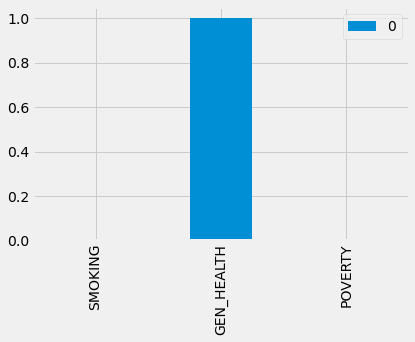

In [53]:
feature_importances.head(10).plot(kind='bar')

# Tree Plot

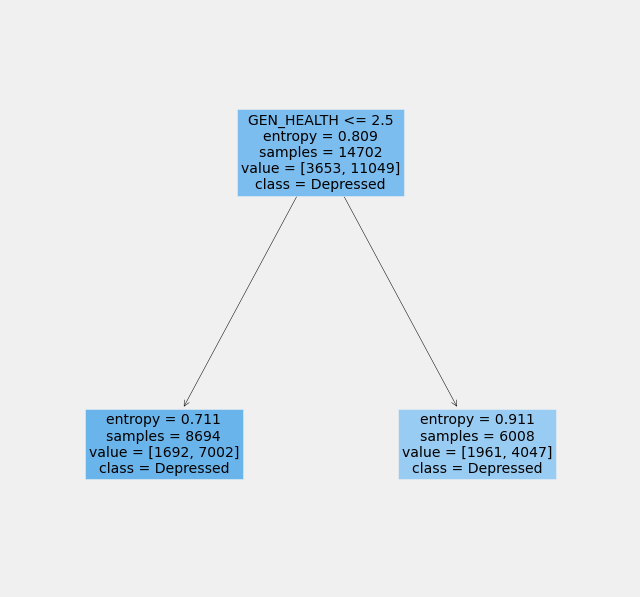

In [54]:
fig = plt.figure(figsize=(10, 10))
_=tree.plot_tree(dep_clf,
                feature_names=ind_var_feat,
                class_names={1:'Depressed', 2:'Not Depressed'},
                filled=True,
                fontsize=14)

Tree plot confirming that only one variable is used in algorithhm

# Conclusions

We have good accuracy (about 75%), but our other measures are not, meaning recall score=0, and 56.6338% precision.

A recall score of 0 usually means the model is bad at predicting true positives.

When we look at the decision tree and the features importances metrics we start seeing that GEN_HEALTH is the only variable being considered.  This may be the reason why we have a fairly good accuarcy, but bad recall and precision scores.

This is leading me to conclude that a decision tree may be the wrong algorithm to use in this case.

Model is ignoring two of the three variables.  Normally this would indicate that GEN_HEALTH is the only variable that is relevant to predicting DEPRESSION.  The implication here is that POVERTY is not related to DEPRESSION, forcing us to reject H_A, and accept H_0.  However, the contradiction between accuracy score and precision and recall scores indicates that DEPRESSION = f(GEN_HEALTH) is not a good model on its own, something else may be going on.

We provide two possible courses of action:

    1.  Because GEN_HEALTH is a predictor, and POVERTY and SMOKING are not considered, the model can be re-run with more then 3 independent variables.  This will leverage the power of a decision tree, and possibly produce a model with better precision and recall scores. 
    
    2.  Run the same variables, but with a regression type of model, possibly a multivariate regression.

It should be noted, that when this model was run with 5 categories for DEPRESSION, we received the exact same values for accuracy, precision and recalls scores.  The levels of categories was a non-issue.

In short, the results of this  model are inconclusive, and further analysis is required either by adding variables, or using a different analytical technique.

Given that other published research has shown that poverty does affect depression, and the contradictions found in this analysis, it may be that the wrong technique was applied.  Therefore, recommend that the same variables be used with a different type of model.  One that involves a multivariate regression would seem the most favorable.
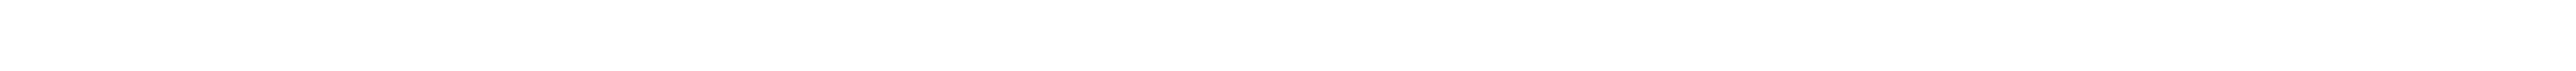